# Movie & Anime Recommender

## Importing datasets

In [286]:
import pandas as pd

anime_df = pd.read_csv('./dataset/anime_dataset/anime.csv')

movies_df = pd.read_csv('./dataset/movie_dataset/tmdb_5000_movies.csv')
movie_credits = pd.read_csv('./dataset/movie_dataset/tmdb_5000_credits.csv')

## Prepairing anime_df

In [257]:
anime_df.head(1)

,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,source,...,producers,licensors,synopsis,background,main_picture,url,trailer_url,title_english,title_japanese,title_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.1,2037075,finished_airing,64.0,2009-04-05,2010-07-04,manga,...,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,NaN,https://cdn.myanimelist.net/images/anime/1208/...,https://myanimelist.net/anime/5114/Fullmetal_A...,https://www.youtube.com/watch?v=--IcmZkvL0Q,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...


In [258]:
#anime_id
#title
#genres
#themes
#demographics
#studios
#producers
#licensors
#synopsis

anime_df = anime_df[['anime_id','title','genres','themes',
                     'demographics','studios','producers','licensors','synopsis']]

anime_df.head(1)

,anime_id,title,genres,themes,demographics,studios,producers,licensors,synopsis
0,5114,Fullmetal Alchemist: Brotherhood,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],['Shounen'],['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...


In [259]:
anime_df.info() #dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24985 non-null  int64 
 1   title         24985 non-null  object
 2   genres        24985 non-null  object
 3   themes        24985 non-null  object
 4   demographics  24985 non-null  object
 5   studios       24985 non-null  object
 6   producers     24985 non-null  object
 7   licensors     24985 non-null  object
 8   synopsis      20492 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.7+ MB


### Dropping null values

In [260]:
anime_df.isnull().sum() #null value check

anime_id           0
title              0
genres             0
themes             0
demographics       0
studios            0
producers          0
licensors          0
synopsis        4493
dtype: int64

In [261]:
anime_df = anime_df.dropna() #dropping null values

### Dropping  duplicate values

In [262]:
anime_df.duplicated().sum() #duplicate value check

np.int64(0)

In [263]:
anime_df = anime_df.drop_duplicates() #dropping duplicate values

### Creating tags column for anime_df

In [264]:
# Prepairing TAGS column
#genres
#themes
#demographics
#studios
#producers
#licensors
#synopsis

anime_df['tags'] = anime_df['genres']+anime_df['themes']+anime_df['demographics']+anime_df['studios']+anime_df['producers']+anime_df['licensors']+anime_df['synopsis']

anime_df.head(1)

,anime_id,title,genres,themes,demographics,studios,producers,licensors,synopsis,tags
0,5114,Fullmetal Alchemist: Brotherhood,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],['Shounen'],['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,"['Action', 'Adventure', 'Drama', 'Fantasy']['M..."


### Final dataframe for anime

In [265]:
# final dataframe to work with
anime_final_df = anime_df[['anime_id','title','tags']]

### Making all alphabets lower case

In [266]:
anime_final_df['tags']=anime_final_df['tags'].fillna('').astype(str).apply(lambda x:x.lower())

/var/folders/9z/ckbkpd7x3r100l5l3b_bq7xr0000gn/T/ipykernel_47329/2380000921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_final_df['tags']=anime_final_df['tags'].fillna('').astype(str).apply(lambda x:x.lower())


In [267]:
anime_final_df.head(1)

,anime_id,title,tags
0,5114,Fullmetal Alchemist: Brotherhood,"['action', 'adventure', 'drama', 'fantasy']['m..."


### Removing punctuations


In [268]:
import re

anime_final_df['tags'] = anime_final_df['tags'].apply(lambda x: re.sub(r"['\"\\.,\\\]\[]", " ", x))

/var/folders/9z/ckbkpd7x3r100l5l3b_bq7xr0000gn/T/ipykernel_47329/660335685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_final_df['tags'] = anime_final_df['tags'].apply(lambda x: re.sub(r"['\"\\.,\\\]\[]", " ", x))


In [269]:
anime_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20492 entries, 0 to 24984
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  20492 non-null  int64 
 1   title     20492 non-null  object
 2   tags      20492 non-null  object
dtypes: int64(1), object(2)
memory usage: 640.4+ KB


In [210]:
anime_final_df.head(1)

,anime_id,title,tags
0,5114,Fullmetal Alchemist: Brotherhood,action adventure drama fantasy m...


## Preparing movies_df

In [287]:
movies_df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [288]:
movie_credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


### Merging movies and credits dataset into movies 

In [289]:
movies_df = movies_df.merge(movie_credits,on='title')

In [290]:
movies_df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [291]:
movies_df = movies_df[['movie_id','title','overview','genres','keywords','cast','crew']]

### Dropping null values

In [292]:
movies_df.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [293]:
movies_df = movies_df.dropna() #dropping null values

### Converting 'genres' and 'keywords' column to list

In [294]:
import ast

def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

movies_df['genres'] = movies_df['genres'].apply(convert)
movies_df.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [295]:
movies_df['keywords'] = movies_df['keywords'].apply(convert)
movies_df.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


### Extracting names from 'cast' column

In [296]:
def extract(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

movies_df['cast'] = movies_df['cast'].apply(extract)
movies_df.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Keeping only three names in 'cast' column

In [297]:
movies_df['cast'] = movies_df['cast'].apply(lambda x:x[0:3])

### Fetch director's name from "crew' column

In [298]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

movies_df['crew'] = movies_df['crew'].apply(fetch_director)
movies_df.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


### Converting lists to strings

In [300]:
movies_df['genres'] = movies_df['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
movies_df['keywords'] = movies_df['keywords'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
movies_df['cast'] = movies_df['cast'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
movies_df['crew'] = movies_df['crew'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

### Creating 'tags' column for movies_df

In [301]:
movies_df['tags'] = movies_df['overview'] + movies_df['genres'] + movies_df['keywords'] + movies_df['cast'] + movies_df['crew']

### Final dataframe for movies

In [303]:
# final dataframe to work with
movies_final_df = movies_df[['movie_id','title','tags']]
movies_final_df.head(1)

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."


### Making all alphabets lowercase in 'tags' columns

In [304]:
movies_final_df['tags'] = movies_final_df['tags'].fillna('').astype(str).apply(lambda x:x.lower())

/var/folders/9z/ckbkpd7x3r100l5l3b_bq7xr0000gn/T/ipykernel_47329/2696223790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_final_df['tags'] = movies_final_df['tags'].fillna('').astype(str).apply(lambda x:x.lower())


### Removing punctuation

In [305]:
movies_final_df['tags'] = movies_final_df['tags'].apply(lambda x: re.sub(r"['\"\\.,\\\]\[]", " ", x))

/var/folders/9z/ckbkpd7x3r100l5l3b_bq7xr0000gn/T/ipykernel_47329/2559298453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_final_df['tags'] = movies_final_df['tags'].apply(lambda x: re.sub(r"['\"\\.,\\\]\[]", " ", x))


In [306]:
movies_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4806 entries, 0 to 4808
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4806 non-null   int64 
 1   title     4806 non-null   object
 2   tags      4806 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.2+ KB


In [307]:
movies_final_df.head(1)

,movie_id,title,tags
0,19995,Avatar,in the 22nd century a paraplegic marine is di...


## Stemming tags column

In [308]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stem(text):
    y=[]
    
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y) 

anime_final_df['tags']=anime_final_df['tags'].apply(stem)
movies_final_df['tags']=movies_final_df['tags'].apply(stem)

/var/folders/9z/ckbkpd7x3r100l5l3b_bq7xr0000gn/T/ipykernel_47329/1603529526.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_final_df['tags']=movies_final_df['tags'].apply(stem)


## Call tf_idf Vectorizer

In [309]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(max_features=5000,stop_words='english')
tf_idf_anime_vectors = tf_idf.fit_transform(anime_final_df['tags']).toarray() 
tf_idf_movie_vectors = tf_idf.fit_transform(movies_final_df['tags']).toarray() 

In [310]:
tf_idf_anime_vectors[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [312]:
tf_idf_movie_vectors[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [316]:
tf_idf.get_feature_names_out()

array(['000', '007', '10', ..., 'zooey', 'zucker', 'zwick'], dtype=object)

In [317]:
from sklearn.metrics.pairwise import cosine_similarity

tf_idf_anime_similarity = cosine_similarity(tf_idf_anime_vectors)
tf_idf_movie_similarity = cosine_similarity(tf_idf_movie_vectors)

In [319]:
tf_idf_anime_similarity

array([[1.        , 0.04260539, 0.04678688, ..., 0.01818784, 0.        ,
        0.0109368 ],
       [0.04260539, 1.        , 0.02338527, ..., 0.02536975, 0.        ,
        0.        ],
       [0.04678688, 0.02338527, 1.        , ..., 0.03163973, 0.01409841,
        0.01216551],
       ...,
       [0.01818784, 0.02536975, 0.03163973, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01409841, ..., 0.        , 1.        ,
        0.19662517],
       [0.0109368 , 0.        , 0.01216551, ..., 0.        , 0.19662517,
        1.        ]])

In [320]:
tf_idf_movie_similarity

array([[1.        , 0.0215145 , 0.02400351, ..., 0.04655994, 0.00838074,
        0.        ],
       [0.0215145 , 1.        , 0.00754713, ..., 0.02701079, 0.        ,
        0.00517097],
       [0.02400351, 0.00754713, 1.        , ..., 0.01457862, 0.        ,
        0.        ],
       ...,
       [0.04655994, 0.02701079, 0.01457862, ..., 1.        , 0.02562228,
        0.00703403],
       [0.00838074, 0.        , 0.        , ..., 0.02562228, 1.        ,
        0.01585084],
       [0.        , 0.00517097, 0.        , ..., 0.00703403, 0.01585084,
        1.        ]])

## Recommendation and Visualization

In [321]:
# Define the visualization function that can be added to your existing script

import matplotlib.pyplot as plt
def recommend_and_visualize(title, dataframe, similarity, n_recommendations=10):
    """
    Visualize recommendations and similarity scores.
    
    Parameters:
    -----------
    title : str
        The title of the input movie / anime
    dataframe : pandas.DataFrame
        DataFrame containing movie / anime information (recommender system dataset)
    similarity : numpy.ndarray
        The cosine similarity matrix
    n_recommendations : int, optional 
        Number of recommendations to show (default is 5)
    """
    
    # Find the index of the input movie / anime
    matching_rows = dataframe[dataframe['title'] == title]
    if matching_rows.empty:
        raise ValueError(f"Title '{title}' not found in DataFrame")
    content_index = matching_rows.index[0]
    
    # Get similarity scores
    distances = similarity[content_index]
    
    # Get top n recommendations (excluding the input game itself)
    content_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:n_recommendations+1]
    
    # Extract titles and similarity scores
    recommended_contents = []
    similarity_scores = []
    
    print(f"Top {n_recommendations} recommendations for '{title}':")
    
    for i in content_list:
        title = dataframe.iloc[i[0]]['title']
        score = i[1]
        recommended_contents.append(title)
        similarity_scores.append(score)
        print(f"{title} : (Similarity: {score:.4f})")

    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Plot horizontal bars
    plt.barh(recommended_contents, similarity_scores, color='royalblue')
    
    # Add labels and title
    plt.xlabel('Cosine Similarity Score')
    plt.title(f'Content Similar to "{title}"')
    plt.xlim(0, 1)  # Cosine similarity ranges from 0 to 1
    
    # Add similarity values at the end of each bar
    for i, v in enumerate(similarity_scores):
        plt.text(v + 0.01, i, f'{v:.4f}', va='center')
    
    plt.tight_layout()
    plt.show()
    
    # Return recommendations and scores
    return pd.DataFrame({
        'Recommended Content': recommended_contents,
        'Similarity Score': similarity_scores,
    })

## Anime Recommendation

Anime Recommendation:

Top 10 recommendations for 'Chainsaw Man':
Shounen Sunday CM: Devil & Devil : (Similarity: 0.2935)
Morengen : (Similarity: 0.2934)
Time Slip Ichimannen: Prime Rose : (Similarity: 0.2719)
Issunboushi: Chibisuke Monogatari : (Similarity: 0.2661)
Devilman: Crybaby : (Similarity: 0.2532)
Nisekoi : (Similarity: 0.2239)
High School DxD : (Similarity: 0.2216)
Beelzebub-jou no Okinimesu mama. : (Similarity: 0.2150)
Jie Mo Ren : (Similarity: 0.2114)
Yondemasu yo, Azazel-san. (TV) : (Similarity: 0.2031)


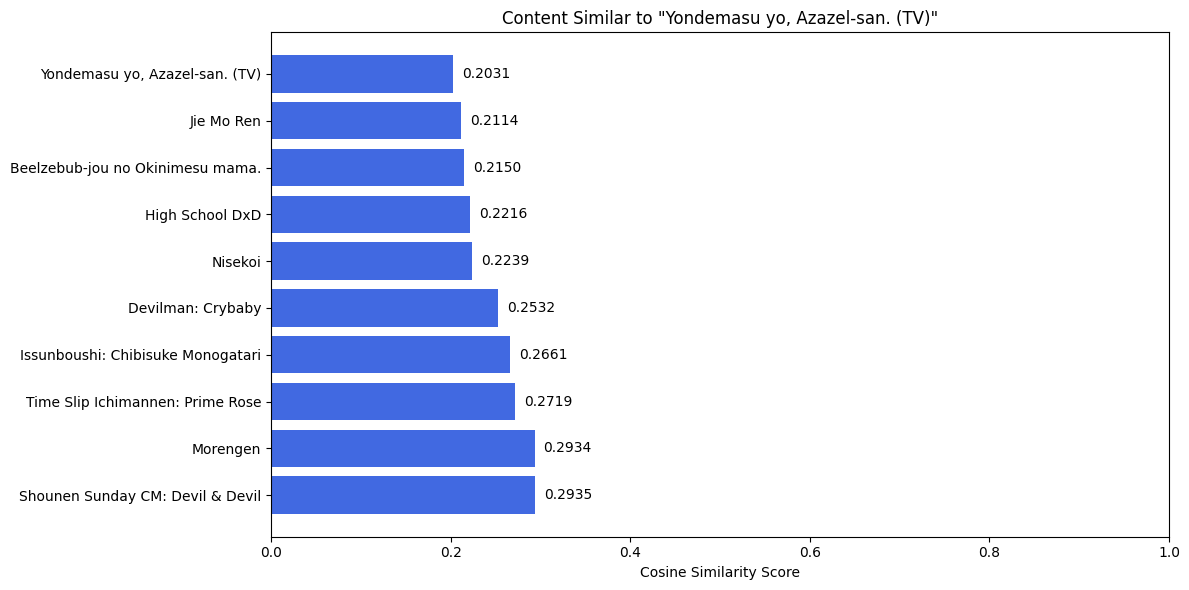

,Recommended Content,Similarity Score
0,Shounen Sunday CM: Devil & Devil,0.293547
1,Morengen,0.293372
2,Time Slip Ichimannen: Prime Rose,0.271883
3,Issunboushi: Chibisuke Monogatari,0.266058
4,Devilman: Crybaby,0.253224
5,Nisekoi,0.223919
6,High School DxD,0.221637
7,Beelzebub-jou no Okinimesu mama.,0.215042
8,Jie Mo Ren,0.211381
9,"Yondemasu yo, Azazel-san. (TV)",0.203053


In [322]:
print("Anime Recommendation:\n")
anime_title = "Chainsaw Man"
recommend_and_visualize(anime_title, anime_final_df, tf_idf_anime_similarity)

## Movie Recommendation

Movie Recommendation:

Top 10 recommendations for 'Catch Me If You Can':
The X Files: I Want to Believe : (Similarity: 0.2270)
Big Mommas: Like Father, Like Son : (Similarity: 0.1940)
Punisher: War Zone : (Similarity: 0.1730)
Mercury Rising : (Similarity: 0.1680)
Point Break : (Similarity: 0.1661)
Everybody's Fine : (Similarity: 0.1642)
The Naked Gun 33⅓: The Final Insult : (Similarity: 0.1574)
American Hustle : (Similarity: 0.1508)
Now You See Me : (Similarity: 0.1393)
Ransom : (Similarity: 0.1379)


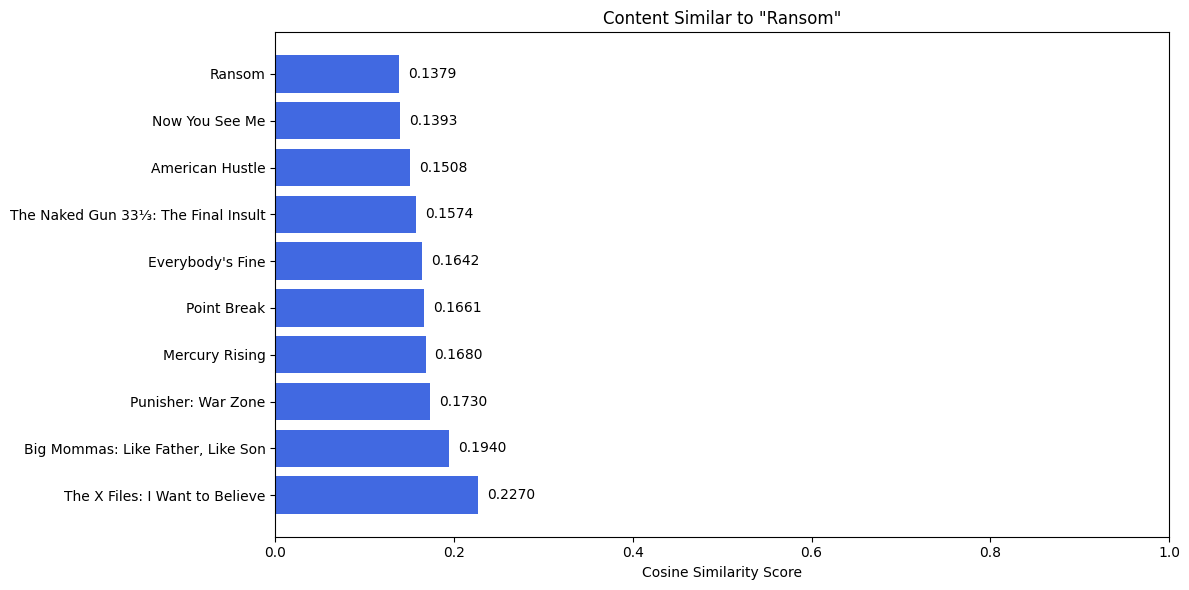

,Recommended Content,Similarity Score
0,The X Files: I Want to Believe,0.227037
1,"Big Mommas: Like Father, Like Son",0.194028
2,Punisher: War Zone,0.173048
3,Mercury Rising,0.167987
4,Point Break,0.166067
5,Everybody's Fine,0.164163
6,The Naked Gun 33⅓: The Final Insult,0.157425
7,American Hustle,0.150835
8,Now You See Me,0.139272
9,Ransom,0.137944


In [326]:
print("Movie Recommendation:\n")
movie_title = "Catch Me If You Can"
recommend_and_visualize(movie_title, movies_final_df, tf_idf_movie_similarity)